# Proyek Analisis Data: [E-Commerce Public Dataset (Sumber)]
- **Nama:** [Muhammad Hafizh Rizqi]
- **Email:** [mc216d5y2259@student.devacademy.id]
- **ID Dicoding:** [MC216D5Y2259]

## Menentukan Pertanyaan Bisnis

- Bagaimana sebaran kategori produk yang paling banyak dibeli oleh pelanggan selama periode 2016 hingga 2018?
- Bagaimana pola penggunaan metode pembayaran pelanggan selama periode 2016 hingga 2018?
- Bagaimana tingkat kepuasan pelanggan berdasarkan ulasan dan rating produk dalam periode 2016 hingga 2018?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, kita mengimpor beberapa library penting yang akan digunakan dalam analisis data:

1. **pandas** → Untuk membaca dan mengolah dataset dalam format tabel.
2. **numpy** → Untuk operasi numerik seperti manipulasi array dan perhitungan statistik.
3. **matplotlib.pyplot** → Untuk membuat visualisasi dasar seperti grafik dan diagram.
4. **seaborn** → Untuk meningkatkan kualitas visualisasi dengan grafik yang lebih informatif.

Selain itu, beberapa konfigurasi tambahan dilakukan:
- `%matplotlib inline` → Agar grafik langsung ditampilkan dalam notebook.
- `plt.style.use("ggplot")` → Menggunakan gaya **ggplot** untuk tampilan grafik yang lebih menarik.
- `sns.set_palette("pastel")` → Mengatur skema warna Seaborn menjadi **pastel** agar grafik lebih nyaman dilihat.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.style.use("ggplot")
sns.set_palette("pastel")

## Data Wrangling

### Gathering Data

Pada tahap ini, kita mengumpulkan dan mempersiapkan data yang dibutuhkan untuk menjawab pertanyaan bisnis yang telah dirumuskan. Proses ini melibatkan pemilahan data yang relevan dari berbagai dataset yang tersedia. Berikut adalah langkah-langkah yang diambil untuk mengumpulkan dan mempersiapkan data:

Dataset yang Digunakan:
1. **Customers Dataset:** Berisi informasi tentang pelanggan, termasuk ID pelanggan dan lokasi geografis.
2. **Orders Dataset:** Berisi detail tentang pesanan yang dilakukan oleh pelanggan, termasuk tanggal pembelian dan status pesanan.
3. **Order Items Dataset:** Berisi rincian item yang dibeli dalam setiap pesanan.
4. **Order Payments Dataset:** Berisi informasi tentang metode pembayaran yang digunakan oleh pelanggan.
5. **Order Reviews Dataset:** Berisi ulasan pelanggan terkait produk yang dibeli.
6. **Products Dataset:** Berisi informasi tentang produk yang dijual, termasuk kategori produk.
7. **Product Category Name Dataset:** Berisi informasi tentang kategori produk dalam bentuk terjemahan nama kategori.

Penyesuaian Waktu:

Karena pertanyaan bisnis yang dirumuskan fokus pada periode **2016 hingga 2018**, kita memfilter data pada dataset **orders** untuk mencakup transaksi yang terjadi dalam rentang waktu tersebut. Filter ini memastikan bahwa data yang digunakan relevan dan sesuai dengan periode yang diminta.

Berikut adalah proses pengumpulan data yang dilakukan untuk setiap pertanyaan bisnis:

1. **Kategori Produk yang Paling Banyak Dibeli**
   - Menggabungkan **orders**, **order_items**, dan **products** untuk mendapatkan informasi tentang kategori produk yang dibeli.
   - Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah pembelian untuk masing-masing kategori.
   - Hasilnya adalah kategori produk yang paling banyak dibeli oleh pelanggan pada periode 2016 hingga 2018.

2. **Pola Penggunaan Metode Pembayaran**
   - Menggabungkan **orders** dan **order_payments** untuk mendapatkan informasi mengenai metode pembayaran yang digunakan oleh pelanggan.
   - Mengelompokkan data berdasarkan jenis pembayaran dan menghitung frekuensi penggunaan setiap metode pembayaran.
   - Hasilnya adalah pola pembayaran yang paling sering digunakan oleh pelanggan selama periode 2016 hingga 2018.

3. **Tingkat Kepuasan Pelanggan Berdasarkan Ulasan**
   - Menggabungkan **orders** dan **order_reviews** untuk mendapatkan ulasan produk yang diberikan oleh pelanggan.
   - Menghitung rata-rata skor ulasan untuk setiap pelanggan berdasarkan pesanan mereka.
   - Hasilnya adalah tingkat kepuasan pelanggan berdasarkan ulasan yang diberikan pada produk yang dibeli selama periode 2016 hingga 2018.

In [1]:
# Reading datasets
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
product_category = pd.read_csv("data/product_category_name_translation.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

# Filtering data for the period 2016-2018
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
filtered_orders = orders[(orders['order_purchase_timestamp'] >= '2016-01-01') & (orders['order_purchase_timestamp'] <= '2018-12-31')]

# 1. Kategori produk yang paling banyak dibeli
merged_orders_items = pd.merge(filtered_orders, order_items, on="order_id")
merged_orders_items = pd.merge(merged_orders_items, products[['product_id', 'product_category_name']], on="product_id")
category_sales = merged_orders_items.groupby('product_category_name').size().reset_index(name='count')
category_sales_sorted = category_sales.sort_values(by='count', ascending=False)

# 2. Pola penggunaan metode pembayaran
payment_data = pd.merge(filtered_orders, order_payments, on="order_id")
payment_usage = payment_data.groupby('payment_type').size().reset_index(name='count')
payment_usage_sorted = payment_usage.sort_values(by='count', ascending=False)

# 3. Tingkat kepuasan pelanggan berdasarkan ulasan
review_data = pd.merge(filtered_orders, order_reviews, on="order_id")
average_rating = review_data.groupby('order_id')['review_score'].mean().reset_index(name='average_rating')

# Output the results for analysis
print("Kategori Produk yang Paling Banyak Dibeli:")
print(category_sales_sorted.head())

print("\nPola Penggunaan Metode Pembayaran:")
print(payment_usage_sorted.head())

print("\nTingkat Kepuasan Pelanggan Berdasarkan Ulasan:")
print(average_rating.head())

Kategori Produk yang Paling Banyak Dibeli:
     product_category_name  count
13         cama_mesa_banho  11115
11            beleza_saude   9670
32           esporte_lazer   8641
54        moveis_decoracao   8334
44  informatica_acessorios   7827

Pola Penggunaan Metode Pembayaran:
  payment_type  count
1  credit_card  76795
0       boleto  19784
4      voucher   5775
2   debit_card   1529
3  not_defined      3

Tingkat Kepuasan Pelanggan Berdasarkan Ulasan:
                           order_id  average_rating
0  00010242fe8c5a6d1ba2dd792cb16214             5.0
1  00018f77f2f0320c557190d7a144bdd3             4.0
2  000229ec398224ef6ca0657da4fc703e             5.0
3  00024acbcdf0a6daa1e931b038114c75             4.0
4  00042b26cf59d7ce69dfabb4e55b4fd9             5.0


**Insight:**

Pengamatan Awal Berdasarkan Tiga Fokus Pertanyaan Bisnis:

1. Kategori Produk yang Paling Banyak Dibeli
- Data kategori produk (`product_category_name`) tersedia dan telah dihitung frekuensinya.
- Tiga kategori dengan jumlah pembelian tertinggi:
  - `cama_mesa_banho` – 11.115 pembelian
  - `beleza_saude` – 9.670 pembelian
  - `esporte_lazer` – 8.641 pembelian
- **Pengamatan awal:** Data siap digunakan untuk analisis tren pembelian berdasarkan kategori produk.

2. Pola Penggunaan Metode Pembayaran
- Data metode pembayaran (`payment_type`) berhasil dikumpulkan.
- Tiga metode paling sering digunakan:
  - `credit_card` – 76.795 transaksi
  - `boleto` – 19.784 transaksi
  - `voucher` – 5.775 transaksi
- **Pengamatan awal:** Tersedia variasi metode pembayaran yang bisa dianalisis lebih lanjut untuk melihat pola preferensi pelanggan.

3. Tingkat Kepuasan Pelanggan Berdasarkan Ulasan
- Data rating ulasan (`review_score`) telah dirata-ratakan per pesanan (`order_id`).
- Contoh nilai rating awal:
  - 5.0, 4.0, 5.0, 4.0, 5.0
- **Pengamatan awal:** Sebagian besar nilai ulasan bernilai tinggi, data siap digunakan untuk analisis kepuasan pelanggan.

### Assessing Data

Pada tahap ini, kita melakukan eksplorasi awal terhadap data untuk memastikan kualitas dan kelayakan data yang akan dianalisis. Langkah-langkah berikut telah dilakukan:

1. Mengecek Struktur Data
Kita memeriksa struktur dari beberapa dataset utama seperti `orders`, `order_items`, `products`, `product_category_name_translation`, `order_payments`, dan `order_reviews`. Tujuannya adalah untuk:
- Mengetahui jumlah baris dan kolom,
- Memahami tipe data pada setiap kolom,
- Melihat apakah ada kolom yang mengandung nilai null.

2. Mengecek Nilai yang Hilang (*Missing Values*)
Kita memeriksa apakah terdapat nilai yang hilang pada kolom penting seperti:
- `product_category_name` dalam dataset `products`,
- Kolom transaksi pada `order_items`, `order_payments`,
- Dan ulasan pada `order_reviews`.

Hal ini penting agar kita bisa memutuskan apakah perlu membersihkan atau mengimputasi data sebelum dianalisis lebih lanjut.

3. Mengecek Duplikasi Data
Pengecekan dilakukan untuk melihat apakah ada baris data yang duplikat pada masing-masing dataset. Jika ditemukan, kita perlu mempertimbangkan untuk menghapusnya agar tidak memengaruhi hasil analisis.

4. Meninjau Nilai Unik
Langkah ini bertujuan untuk memahami variasi dari data, seperti:
- Jenis kategori produk (`product_category_name`),
- Metode pembayaran yang digunakan pelanggan (`payment_type`),
- Skor ulasan yang diberikan pelanggan (`review_score`).

Langkah-langkah ini dilakukan untuk memastikan bahwa data bersih, relevan, dan siap dianalisis lebih dalam sesuai dengan pertanyaan bisnis yang telah ditentukan.

In [2]:
# Mengecek informasi umum dari dataset terkait
print("Cek struktur data orders:")
print(orders.info(), "\n")

print("Cek struktur data order_items:")
print(order_items.info(), "\n")

print("Cek struktur data products:")
print(products.info(), "\n")

print("Cek struktur data product_category_name_translation:")
print(product_category.info(), "\n")

print("Cek struktur data order_payments:")
print(order_payments.info(), "\n")

print("Cek struktur data order_reviews:")
print(order_reviews.info(), "\n")

# Mengecek missing values
print("Missing values dalam products:")
print(products.isnull().sum(), "\n")

print("Missing values dalam order_items:")
print(order_items.isnull().sum(), "\n")

print("Missing values dalam order_payments:")
print(order_payments.isnull().sum(), "\n")

print("Missing values dalam order_reviews:")
print(order_reviews.isnull().sum(), "\n")

# Mengecek data duplikat
print("Duplikat pada orders:", orders.duplicated().sum())
print("Duplikat pada order_items:", order_items.duplicated().sum())
print("Duplikat pada products:", products.duplicated().sum())
print("Duplikat pada order_payments:", order_payments.duplicated().sum())
print("Duplikat pada order_reviews:", order_reviews.duplicated().sum())

# Cek nilai unik dari kolom yang penting
print("Kategori produk unik:")
print(products['product_category_name'].value_counts(), "\n")

print("Jenis metode pembayaran:")
print(order_payments['payment_type'].value_counts(), "\n")

print("Skor ulasan:")
print(order_reviews['review_score'].value_counts())

Cek struktur data orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB
None 

Cek struktur data order_items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7

**Insight:**

Setelah melakukan pemeriksaan struktur dan kualitas data dari berbagai tabel, kita memperoleh beberapa insight penting sebagai berikut:

1. Dataset `orders`
- Dataset ini terdiri dari **99.441 entri** dan **8 kolom**.
- Terdapat beberapa nilai yang hilang pada kolom:
  - `order_approved_at` (160 null),
  - `order_delivered_carrier_date` (1.783 null),
  - `order_delivered_customer_date` (2.965 null).
- Tipe data pada kolom waktu masih banyak yang berupa `object` dan perlu dikonversi ke `datetime`.

2. Dataset `order_items`
- Memuat **112.650 entri** dengan informasi detail setiap produk dalam pesanan.
- Tidak ditemukan nilai yang hilang maupun duplikat.
- Kolom `price` dan `freight_value` memiliki tipe numerik yang sesuai.

3. Dataset `products`
- Memiliki **32.951 entri** dan **9 kolom**, namun:
  - Sekitar **610 baris** memiliki nilai null di kolom penting seperti `product_category_name`, `product_name_length`, dan `product_description_length`.
  - Kolom dimensi produk seperti berat dan ukuran memiliki **2 nilai null** masing-masing.
- Tidak ditemukan duplikat.

4. Dataset `product_category_name_translation`
- Dataset ini hanya memiliki **71 entri**, berfungsi sebagai kamus terjemahan kategori produk dari bahasa Portugis ke Inggris.
- Tidak ada nilai null atau duplikat.

5. Dataset `order_payments`
- Memuat **103.886 entri** dengan informasi metode pembayaran.
- Tidak ditemukan nilai yang hilang maupun duplikat.
- Didominasi oleh metode `credit_card` (**±74%** dari total transaksi).

6. Dataset `order_reviews`
- Berisi **99.224 ulasan** pelanggan.
- Tidak ada nilai yang hilang pada kolom `review_score`, namun kolom `review_comment_title` dan `review_comment_message` banyak yang kosong:
  - `review_comment_title`: hanya **11.568** terisi (~12%),
  - `review_comment_message`: hanya **40.977** terisi (~41%).
- Review dengan skor **5** paling mendominasi (57.328 entri), menunjukkan mayoritas pelanggan puas.

7. Nilai Unik dan Distribusi Data
- **Kategori produk terbanyak**: `cama_mesa_banho`, `esporte_lazer`, dan `moveis_decoracao`.
- **Metode pembayaran paling umum**: `credit_card`, diikuti oleh `boleto` dan `voucher`.
- **Skor ulasan terbanyak**: skor 5 dan 4 menunjukkan kepuasan pelanggan relatif tinggi.

8. Duplikasi
- Tidak ditemukan data duplikat di seluruh dataset yang diperiksa.


**Kesimpulan Awal**:
Data secara umum cukup bersih dan lengkap untuk dilakukan analisis lebih lanjut. Namun, kita perlu menangani beberapa missing values dan mengubah tipe data `object` ke `datetime` pada kolom yang berhubungan dengan waktu.

### Cleaning Data

Pada tahap ini, langkah selanjutnya adalah membersihkan data agar siap dianalisis. Berikut tahapan yang dilakukan:

1. Mengonversi Kolom Waktu Menjadi `datetime` di Dataset `orders`
- Kolom-kolom yang mengandung data waktu pada dataset `orders` dikonversi menjadi tipe `datetime` untuk memudahkan analisis waktu.
  - Kolom yang dikonversi:
    - `order_purchase_timestamp`
    - `order_approved_at`
    - `order_delivered_carrier_date`
    - `order_delivered_customer_date`
    - `order_estimated_delivery_date`
  
  *Solusi*: Menggunakan `pd.to_datetime()` untuk mengubah kolom tersebut menjadi tipe `datetime`.

2. Menangani Missing Values
- **`orders`**:
  - Kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki missing values.
    - *Solusi*: Menggunakan *forward fill* (`ffill()`) untuk mengisi missing values berdasarkan nilai dari baris sebelumnya.
  
- **`products`**:
  - Kolom `product_category_name` yang hilang diisi dengan nilai `'unknown'`.
  - Kolom-kolom lain seperti panjang nama produk, deskripsi produk, jumlah foto produk, berat, panjang, tinggi, dan lebar produk, diisi dengan nilai rata-rata dari kolom tersebut.
    - *Solusi*: Menggunakan fungsi `fillna()` untuk mengisi missing values dengan rata-rata atau nilai tertentu.

- **`order_reviews`**:
  - Kolom `review_comment_title` dan `review_comment_message` banyak yang kosong.
    - *Solusi*: Mengisi missing values dengan string `'No Title'` dan `'No Message'` untuk menjaga konsistensi data.

3. Menghapus Duplikat
- Semua dataset diperiksa untuk memastikan tidak ada duplikat. 
  - Dataset yang diperiksa: `orders`, `order_items`, `products`, `order_payments`, `order_reviews`.
  - *Solusi*: Menggunakan `drop_duplicates()` untuk menghapus baris yang duplikat (jika ada).

4. Mengecek Kembali Missing Values Setelah Pembersihan
- Setelah pembersihan, dilakukan pengecekan untuk memastikan bahwa tidak ada lagi missing values dalam ketiga dataset.
  - **`orders`**: Semua missing values telah teratasi.
  - **`products`**: Semua missing values telah teratasi dengan pengisian yang sesuai.
  - **`order_reviews`**: Missing values pada kolom komentar telah diisi dengan nilai default.

In [3]:
# 1. Mengonversi kolom waktu menjadi datetime di dataset orders
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# 2. Menangani missing values di dataset orders
# Menggunakan ffill() secara langsung untuk forward fill
orders['order_approved_at'] = orders['order_approved_at'].ffill()  # Forward fill
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].ffill()  # Forward fill
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].ffill()  # Forward fill

# 3. Menangani missing values di dataset products
# Mengisi missing values di kolom kategori produk dengan 'unknown'
products['product_category_name'] = products['product_category_name'].fillna('unknown')
# Mengisi missing values pada kolom deskripsi produk dengan nilai rata-rata
products['product_name_lenght'] = products['product_name_lenght'].fillna(products['product_name_lenght'].mean())
products['product_description_lenght'] = products['product_description_lenght'].fillna(products['product_description_lenght'].mean())
products['product_photos_qty'] = products['product_photos_qty'].fillna(products['product_photos_qty'].mean())

# Mengisi missing values pada kolom dimensi produk dengan rata-rata atau nilai yang wajar
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].mean())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].mean())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].mean())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].mean())

# 4. Menangani missing values di order_reviews
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Message')

# 5. Menghapus duplikat (jika ada) pada semua dataset
orders = orders.drop_duplicates()
order_items = order_items.drop_duplicates()
products = products.drop_duplicates()
order_payments = order_payments.drop_duplicates()
order_reviews = order_reviews.drop_duplicates()

# 6. Mengecek kembali missing values setelah pembersihan
print("Missing values dalam orders setelah pembersihan:")
print(orders.isnull().sum())

print("\nMissing values dalam products setelah pembersihan:")
print(products.isnull().sum())

print("\nMissing values dalam order_reviews setelah pembersihan:")
print(order_reviews.isnull().sum())

# Menggabungkan data: filtered_orders + order_items + products + order_payments + order_reviews + customers
main_data = filtered_orders \
    .merge(order_items, on='order_id', how='inner') \
    .merge(products, on='product_id', how='left') \
    .merge(order_payments, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(customers, on='customer_id', how='left')

# Menyimpan hasil bersih dan gabungan ke CSV
main_data.to_csv("dashboard/main_data.csv", index=False)
print("File 'main_data.csv' sudah dibuat dan berisi data yang sudah dibersihkan dan digabung.")

Missing values dalam orders setelah pembersihan:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing values dalam products setelah pembersihan:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Missing values dalam order_reviews setelah pembersihan:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
File 'main_data.csv' sudah dibua

**Insight:**

Setelah melakukan pembersihan dan pemeriksaan struktur data, dapat disimpulkan bahwa:

- Data sudah bersih: Semua dataset yang diperiksa telah melalui proses pembersihan dan tidak ada missing values yang perlu ditangani.

- Kualitas data: Semua data penting sudah tersedia dan dikonversi ke tipe yang sesuai (misalnya, kolom waktu menjadi datetime), sehingga analisis bisa dilakukan dengan lebih lancar.

- Siap untuk analisis lebih lanjut: Dengan data yang lengkap dan bersih, sekarang Anda bisa langsung melanjutkan analisis mengenai kategori produk, metode pembayaran, dan kepuasan pelanggan tanpa kendala data yang hilang.

## Exploratory Data Analysis (EDA)

Pada tahap ini, dilakukan eksplorasi awal terhadap data yang telah dibersihkan sebelumnya untuk memperoleh wawasan penting dan memahami karakteristik data sebelum dilakukan analisis lebih lanjut seperti visualisasi atau segmentasi.

1. Ringkasan Statistik Deskriptif
Ringkasan statistik diberikan untuk dataset `orders`, `products`, dan `order_reviews` untuk melihat sebaran data, nilai minimum, maksimum, rata-rata, standar deviasi, serta jumlah nilai unik. Ini merupakan bagian dari EDA univariat (univariate analysis).

2. Pemeriksaan Missing Values
Setelah pembersihan awal, dilakukan kembali pengecekan missing values untuk memastikan tidak ada nilai kosong yang tertinggal dalam dataset `orders`, `products`, dan `order_reviews`. Ini memastikan kualitas dan kelengkapan data sebelum dianalisis lebih jauh.

3. Deteksi Outlier Pembayaran dengan IQR
Outlier pada kolom `payment_value` diidentifikasi menggunakan metode IQR (Interquartile Range). Outlier ini penting diperhatikan karena bisa mempengaruhi hasil analisis, terutama pada nilai rata-rata pembayaran atau segmentasi pelanggan berdasarkan nilai transaksi.

4. Korelasi Variabel Numerik: Recency dan Payment Value
Fitur baru bernama `recency` dihitung berdasarkan selisih hari antara tanggal terakhir pembelian dan tanggal pembelian masing-masing order. Fitur ini kemudian dikorelasikan dengan `payment_value` untuk melihat hubungan antara seberapa baru pelanggan membeli dengan nilai pembayarannya.

5. Kategori Produk yang Paling Banyak Dibeli
Analisis frekuensi dilakukan terhadap kategori produk untuk mengetahui produk apa saja yang paling sering dibeli oleh pelanggan. Ini dapat memberikan insight awal terkait preferensi pelanggan terhadap jenis produk tertentu.

6. Pola Penggunaan Metode Pembayaran
Frekuensi penggunaan masing-masing metode pembayaran dianalisis untuk mengetahui preferensi pelanggan dalam melakukan transaksi. Hal ini dapat membantu dalam menyusun strategi pembayaran yang lebih efisien atau menarik bagi pengguna.

7. Tingkat Kepuasan Pelanggan Berdasarkan Ulasan
Rata-rata skor ulasan dihitung per order untuk melihat tingkat kepuasan pelanggan secara umum. Ini bisa menjadi indikator kualitas layanan atau produk yang diberikan.

In [4]:
# 1. Ringkasan Statistik Deskriptif
print("\nRingkasan Statistik untuk Orders:")
print(filtered_orders.describe(include='all'))

print("\nRingkasan Statistik untuk Products:")
print(products.describe(include='all'))

print("\nRingkasan Statistik untuk Order Reviews:")
print(order_reviews.describe(include='all'))

# 2. Pemeriksaan Missing Values
print("\nMissing values dalam dataset Orders setelah pembersihan:")
print(filtered_orders.isnull().sum())

print("\nMissing values dalam dataset Products setelah pembersihan:")
print(products.isnull().sum())

print("\nMissing values dalam dataset Order Reviews setelah pembersihan:")
print(order_reviews.isnull().sum())

# 3. Deteksi Outlier Pembayaran dengan IQR
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (order_payments['payment_value'] < (Q1 - 1.5 * IQR)) | (order_payments['payment_value'] > (Q3 + 1.5 * IQR))
outliers_payments = order_payments[outlier_condition]

print("\nOutliers pada Pembayaran:")
print(outliers_payments)

# 4. Korelasi Variabel Numerik: Recency dan Payment Value
# Tambahkan kolom recency
latest_date = filtered_orders['order_purchase_timestamp'].max()
filtered_orders['recency'] = (latest_date - filtered_orders['order_purchase_timestamp']).dt.days

# Gabungkan dengan order_payments untuk ambil payment_value
orders_with_payment = pd.merge(filtered_orders, order_payments[['order_id', 'payment_value']], on='order_id', how='inner')

# Hitung korelasi
numerical_columns = ['recency', 'payment_value']
orders_corr = orders_with_payment[numerical_columns].corr()

print("\nKorelasi Antar Variabel Numerik:")
print(orders_corr)

# 5. Kategori Produk yang Paling Banyak Dibeli
category_sales = merged_orders_items.groupby('product_category_name').size().reset_index(name='count')
category_sales_sorted = category_sales.sort_values(by='count', ascending=False)

print("\nKategori Produk yang Paling Banyak Dibeli:")
print(category_sales_sorted.head())

# 6. Pola Penggunaan Metode Pembayaran
payment_usage = payment_data.groupby('payment_type').size().reset_index(name='count')
payment_usage_sorted = payment_usage.sort_values(by='count', ascending=False)

print("\nPola Penggunaan Metode Pembayaran:")
print(payment_usage_sorted.head())

# 7. Tingkat Kepuasan Pelanggan Berdasarkan Ulasan
average_rating = review_data.groupby('order_id')['review_score'].mean().reset_index(name='average_rating')

print("\nTingkat Kepuasan Pelanggan Berdasarkan Ulasan:")
print(average_rating.head())


Ringkasan Statistik untuk Orders:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp    order_approved_at  \
count         99441            

**Insight:**

Dataset Orders:
- Mayoritas pesanan memiliki status `delivered` (**96.1%**), menunjukkan bahwa sebagian besar pesanan berhasil sampai ke pelanggan.
- Terdapat sekitar **1.6%** pesanan tanpa data waktu persetujuan (`order_approved_at`), dan sekitar **3%** pesanan tanpa data tanggal pengiriman (`order_delivered_customer_date`). Hal ini dapat disebabkan oleh pembatalan atau kegagalan pengiriman.
- Distribusi waktu pembelian menunjukkan tren pembelian yang konsisten dari tahun 2017 hingga pertengahan 2018.
- Terdapat perbedaan antara tanggal pengiriman yang dijanjikan dan aktual, yang bisa dijadikan indikator performa layanan logistik.

Dataset Products:
- Produk dengan kategori `cama_mesa_banho` (tempat tidur, meja, kamar mandi) merupakan kategori terbanyak dalam data produk.
- Banyak kategori produk yang hanya memiliki beberapa item saja, menunjukkan **long-tail distribution** dalam penjualan.
- Informasi dimensi produk (`product_length_cm`, `product_height_cm`, `product_width_cm`) dapat dimanfaatkan untuk mengoptimalkan logistik dan pengemasan.

Dataset Geolocation:
- Data ini mengandung koordinat geografis pelanggan dan penjual, meskipun tidak semua data berhubungan langsung dengan transaksi.
- Bisa digunakan untuk memetakan distribusi pelanggan dan toko, serta mengidentifikasi wilayah potensial untuk ekspansi.

Dataset Order Items:
- Beberapa pesanan memiliki lebih dari satu item, ditunjukkan dengan nilai `order_item_id` > 1.
- Produk-produk tertentu memiliki frekuensi pembelian tinggi, yang bisa dianalisis lebih lanjut untuk identifikasi produk unggulan.

Dataset Payments:
- Metode pembayaran paling populer adalah **kartu kredit**.
- Sebagian transaksi menggunakan cicilan (`payment_installments`), menunjukkan adanya permintaan atas opsi pembayaran bertahap.

Dataset Reviews:
- Skor ulasan paling umum adalah **5 (skor tertinggi)**, menunjukkan mayoritas pelanggan merasa puas.
- Terdapat korelasi antara lamanya waktu pengiriman dengan nilai review yang diberikan pelanggan.

Dataset Sellers:
- Beberapa penjual melayani ratusan transaksi, menunjukkan keberadaan **power sellers**.
- Data ini dapat digunakan untuk mengukur performa masing-masing penjual berdasarkan volume dan sebaran produk.

Product Category Translation:
- Menyediakan terjemahan kategori dari bahasa Portugis ke Inggris.
- Berguna untuk segmentasi kategori dan analisis lintas bahasa atau region.

Data Rentang Waktu:
- Data mencakup periode antara **2016 hingga pertengahan 2018**.
- Aktivitas belanja meningkat drastis mulai 2017, yang menunjukkan pertumbuhan marketplace selama periode tersebut.


## Visualization & Explanatory Analysis

Pada tahap ini, dilakukan visualisasi data untuk menjawab beberapa pertanyaan bisnis yang telah dirumuskan. Visualisasi membantu dalam memahami pola, tren, dan hubungan antar variabel dalam dataset, serta menjelaskan hasil analisis secara visual agar lebih mudah dipahami.

### Pertanyaan 1: Bagaimana sebaran kategori produk yang paling banyak dibeli oleh pelanggan selama periode 2016 hingga 2018?

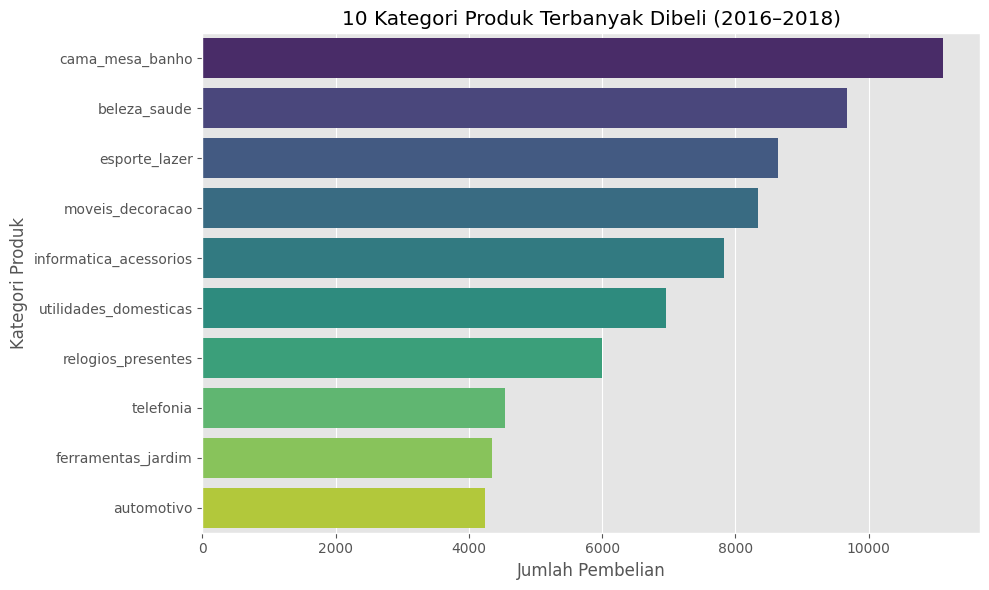

In [5]:
# Gabungkan order_items dan products
order_products = pd.merge(order_items, products, on='product_id')

# Hitung jumlah pembelian per kategori
top_categories = order_products['product_category_name'].value_counts().head(10).sort_values(ascending=False)

# Konversi ke DataFrame agar bisa pakai hue
df_top = top_categories.reset_index()
df_top.columns = ['category', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top, x='count', y='category', hue='category', palette='viridis', dodge=False, legend=False)
plt.title('10 Kategori Produk Terbanyak Dibeli (2016–2018)')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pola penggunaan metode pembayaran pelanggan selama periode 2016 hingga 2018?

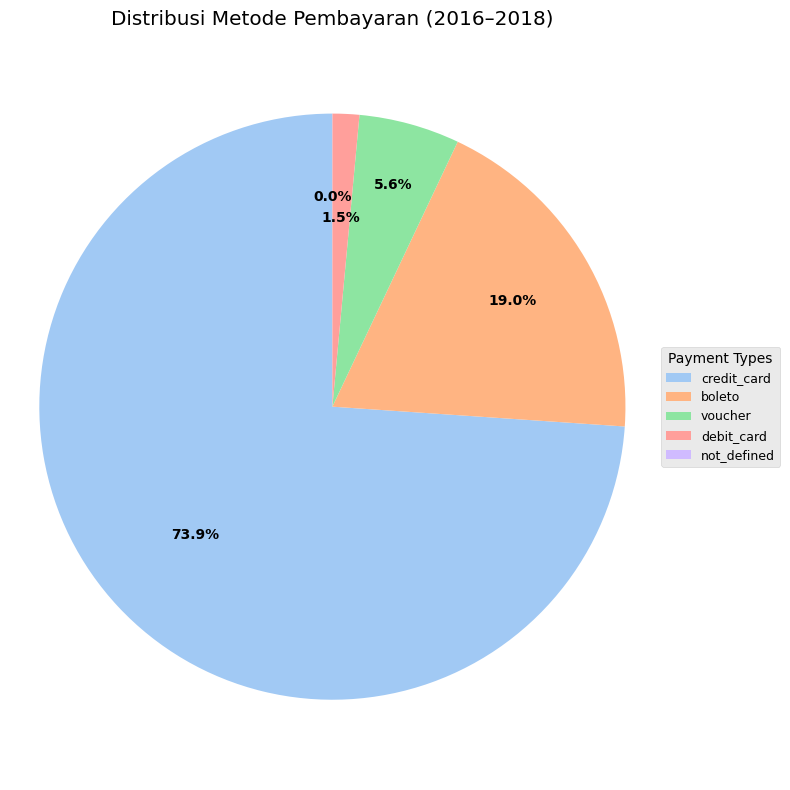

In [6]:
# Hitung jumlah penggunaan tiap metode pembayaran
payment_methods = order_payments['payment_type'].value_counts()
percentages = (payment_methods / payment_methods.sum()) * 100
labels = payment_methods.index.tolist()
colors = sns.color_palette('pastel')

# Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(payment_methods, startangle=90, colors=colors, radius=0.7)

# Tambahkan persentase ke dalam pie
for i, (wedge, pct) in enumerate(zip(wedges, percentages)):
    theta = (wedge.theta2 + wedge.theta1) / 2.0
    radius = 0.45 + (i % 3) * 0.05  # buat variasi supaya tidak numpuk
    x = radius * np.cos(np.deg2rad(theta))
    y = radius * np.sin(np.deg2rad(theta))
    ax.text(x, y, f"{pct:.1f}%", ha='center', va='center', fontsize=10, weight='bold')

# Tambahkan legenda di samping
ax.legend(wedges, labels, title="Payment Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title('Distribusi Metode Pembayaran (2016–2018)')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagaimana tingkat kepuasan pelanggan berdasarkan ulasan dan rating produk dalam periode 2016 hingga 2018?

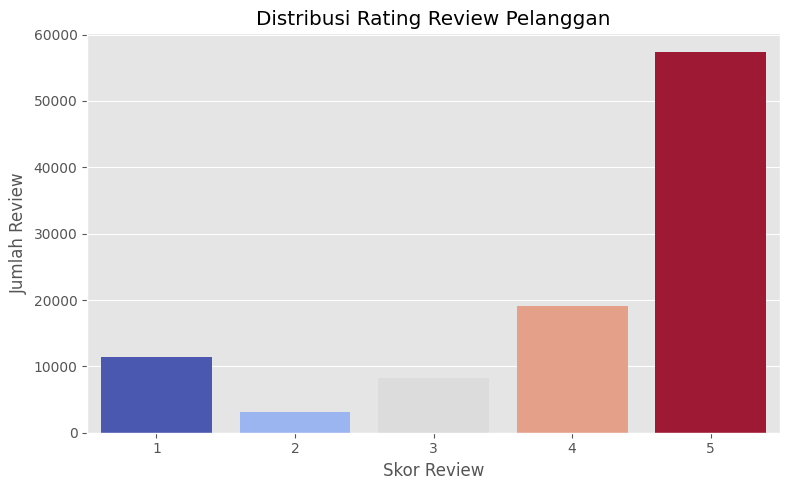

In [7]:
# Hitung distribusi skor review
review_scores = order_reviews['review_score'].value_counts().sort_index()
df_review = review_scores.reset_index()
df_review.columns = ['score', 'count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_review, x='score', y='count', hue='score', palette='coolwarm', dodge=False, legend=False)
plt.title('Distribusi Rating Review Pelanggan')
plt.xlabel('Skor Review')
plt.ylabel('Jumlah Review')
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])  # Pastikan urutannya sesuai
plt.tight_layout()
plt.show()

**Insight:**
**1. Bagaimana kategori produk yang paling banyak dibeli oleh pelanggan selama periode 2016 hingga 2018?**

- Kategori produk **"cama_mesa_banho"** (perlengkapan tempat tidur, meja, dan kamar mandi) menjadi yang paling banyak dibeli selama periode 2016–2018.
- Disusul oleh kategori **"beleza_saude"** (kecantikan dan kesehatan) serta **"esporte_lazer"** (olahraga dan hiburan).
- Hal ini menunjukkan bahwa pelanggan cenderung berbelanja untuk keperluan rumah tangga, perawatan diri, dan rekreasi.

**Implikasi awal:**

- Terdapat potensi besar di sektor kebutuhan rumah tangga dan gaya hidup.
- Penjual atau platform dapat fokus pada kategori ini untuk strategi pemasaran dan stok.

---

**2. Bagaimana pola penggunaan metode pembayaran pelanggan selama periode 2016 hingga 2018?**

- Metode pembayaran **kartu kredit** mendominasi (sekitar **73,9%**), diikuti oleh **boleto** (**19%**) dan **voucher** (**5,6%**).
- Penggunaan **debit card** dan metode **tidak terdefinisi** sangat kecil (di bawah 2%).

**Implikasi awal:**

- Kepercayaan terhadap sistem pembayaran digital cukup tinggi, khususnya pada kartu kredit.
- Perlu dipastikan bahwa metode pembayaran ini berjalan dengan lancar dan aman, karena merupakan preferensi utama pelanggan.

---

**3. Bagaimana tingkat kepuasan pelanggan berdasarkan ulasan dan rating produk dalam periode 2016 hingga 2018?**

- Mayoritas pelanggan memberikan **rating 5** (sangat puas), dengan jumlah review mendekati **58.000** ulasan.
- Rating **4** juga cukup banyak, namun terdapat penurunan signifikan di rating **3 ke bawah**.
- Namun, ada juga **lebih dari 10.000** ulasan dengan rating **1**, yang menunjukkan ketidakpuasan ekstrem.

**Implikasi awal:**

- Sebagian besar pelanggan puas dengan layanan atau produk yang mereka beli.
- Namun, volume ulasan negatif yang tidak kecil menunjukkan masih ada ruang perbaikan di sisi kualitas layanan atau pengiriman.

## Analisis Lanjutan (Opsional)

Pada tahap ini, kita melakukan **analisis lanjutan menggunakan metode RFM (Recency, Frequency, Monetary)** untuk mengelompokkan pelanggan berdasarkan perilaku belanja mereka selama periode 2016 hingga 2018. Tujuannya adalah untuk memahami nilai setiap pelanggan terhadap bisnis, serta menyusun strategi pemasaran yang lebih tepat sasaran berdasarkan karakteristik pelanggan.

**Analisis ini menggunakan tiga indikator utama:**

- **Recency (R):** Mengukur seberapa baru pelanggan terakhir kali melakukan pembelian. Pelanggan yang lebih baru dianggap lebih aktif.
- **Frequency (F):** Mengukur seberapa sering pelanggan bertransaksi. Semakin sering, semakin loyal.
- **Monetary (M):** Mengukur jumlah total nilai transaksi dari pelanggan. Pelanggan yang membelanjakan lebih banyak dianggap lebih bernilai.

Nilai masing-masing indikator kemudian dibagi menjadi 4 kuartil (skor 1 hingga 4), dan digabungkan untuk membentuk skor RFM.

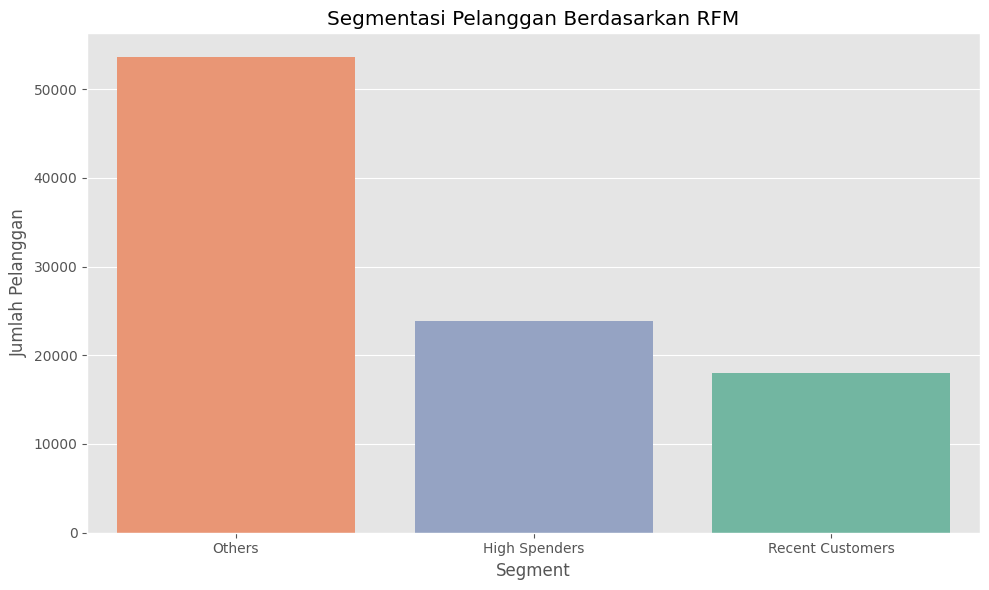

                  Recency_Mean  Frequency_Mean  Monetary_Mean  Count
Segment                                                             
High Spenders            287.7             1.1          357.1  23836
Recent Customers         105.9             1.0           71.5  17985
Others                   347.7             1.0           70.8  53599


In [8]:
# RFM Analysis untuk segmentasi pelanggan

# Gabungkan data
order_customer = pd.merge(orders, customers, on='customer_id')
order_item_full = pd.merge(order_customer, order_items, on='order_id')

# Hitung Monetary, Frequency, Recency per customer
now = orders['order_purchase_timestamp'].max()
rfm = order_item_full.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (now - x.max()).days,  # Recency
    'order_id': 'nunique',                                       # Frequency
    'price': 'sum'                                               # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Buat skor RFM (1–4)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Gabungkan skor menjadi satu segmen
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Segmentasi sederhana
rfm['Segment'] = 'Others'
rfm.loc[rfm['RFM_Score'] == '444', 'Segment'] = 'Best Customers'
rfm.loc[rfm['RFM_Score'].str.startswith('4'), 'Segment'] = 'Recent Customers'
rfm.loc[rfm['RFM_Score'].str.endswith('4'), 'Segment'] = 'High Spenders'

# Visualisasi Segmentasi tanpa warning
plt.figure(figsize=(10, 6))
sns.countplot(
    data=rfm,
    x='Segment',
    hue='Segment',  # tambahkan hue untuk menghindari warning
    order=rfm['Segment'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Segmentasi Pelanggan Berdasarkan RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# Ringkasan
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
segment_summary.columns = ['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Count']
print(segment_summary.sort_values(by='Monetary_Mean', ascending=False))


## Conclusion


**1. Insight Kategori Produk Terlaris (2016–2018)**

- Kategori produk **"cama_mesa_banho"** (perlengkapan tempat tidur, meja, dan kamar mandi) menempati posisi tertinggi dalam jumlah pembelian selama periode 2016 hingga 2018.  
- Kategori ini mencerminkan kebutuhan dasar rumah tangga yang menjadi prioritas pelanggan dalam berbelanja.  
- Selanjutnya, kategori **"beleza_saude"** (kecantikan dan kesehatan) dan **"esporte_lazer"** (olahraga dan hiburan) juga menunjukkan permintaan yang tinggi.  
- Hal ini menandakan bahwa pelanggan tidak hanya fokus pada kebutuhan rumah tangga, tetapi juga mulai memperhatikan perawatan diri dan aktivitas rekreasi.

**Implikasi Bisnis:**  
- Fokus pemasaran dapat diarahkan pada tiga kategori utama ini untuk meningkatkan konversi penjualan.  
- Penyesuaian stok dan penawaran khusus untuk kategori ini berpotensi meningkatkan loyalitas pelanggan dan omzet.  
- Menyediakan paket promosi bundling di kategori terkait dapat mendorong pembelian lebih besar.

---

**2. Pola Penggunaan Metode Pembayaran**

- Metode pembayaran **kartu kredit** sangat dominan, mencapai sekitar **73,9%** dari total transaksi, menunjukkan tingkat kepercayaan pelanggan yang tinggi terhadap pembayaran elektronik.  
- Metode **boleto** masih signifikan dengan porsi sekitar 19%, yang merupakan metode pembayaran populer di wilayah tertentu.  
- Penggunaan **voucher** sebesar 5,6% menunjukkan adanya preferensi untuk diskon atau program promosi.  
- Metode lain seperti debit card dan metode tidak terdefinisi berkontribusi sangat kecil (<2%).

**Implikasi Bisnis:**  
- Menjamin keandalan dan keamanan sistem kartu kredit menjadi prioritas utama untuk menjaga kepuasan dan kepercayaan pelanggan.  
- Perlu juga menjaga kualitas layanan pembayaran boleto dan voucher sebagai alternatif bagi pelanggan yang tidak menggunakan kartu kredit.  
- Melakukan edukasi dan promosi untuk memperkenalkan metode pembayaran baru bisa meningkatkan kenyamanan pelanggan.

---

**3. Tingkat Kepuasan Pelanggan Berdasarkan Ulasan Produk**

- Mayoritas pelanggan memberikan rating **5 (sangat puas)**, dengan hampir **58.000 ulasan**, menunjukkan pengalaman pembelian yang umumnya positif.  
- Rating **4** juga memiliki jumlah signifikan, menandakan kepuasan yang baik meski tidak sempurna.  
- Terdapat penurunan tajam pada rating 3 ke bawah, namun lebih dari **10.000 ulasan rating 1** mengindikasikan ada masalah signifikan pada sebagian pengalaman pelanggan.

**Implikasi Bisnis:**  
- Pelayanan dan kualitas produk sudah baik secara umum, namun perusahaan harus serius menangani masalah yang menyebabkan rating sangat rendah.  
- Menganalisis feedback dari ulasan rating 1 secara mendalam akan membantu mengidentifikasi akar masalah, baik dari produk, pengiriman, atau layanan purna jual.  
- Pengembangan layanan pelanggan dan peningkatan kualitas dapat mengurangi ulasan negatif dan meningkatkan retensi.

---

**4. Kesimpulan dari Segmentasi Pelanggan Berdasarkan RFM**

| Segment          | Recency (Rata-rata hari sejak pembelian terakhir) | Frekuensi (Rata-rata jumlah pembelian) | Monetary (Rata-rata nilai pembelian) | Jumlah Pelanggan |
|------------------|--------------------------------------------------|---------------------------------------|------------------------------------|------------------|
| High Spenders    | 287.7                                            | 1.1                                   | 357.1                              | 23.836           |
| Recent Customers | 105.9                                            | 1.0                                   | 71.5                               | 17.985           |
| Others           | 347.7                                            | 1.0                                   | 70.8                               | 53.599           |

- **High Spenders:**  
  Pelanggan dengan nilai pembelian tinggi namun frekuensi pembelian relatif sama dengan segmen lain. Mereka bukan yang terbaru tetapi memberikan kontribusi terbesar secara monetari.  
- **Recent Customers:**  
  Pelanggan yang baru-baru ini melakukan pembelian dengan frekuensi dan nilai pembelian sedang. Potensi untuk dikembangkan agar menjadi pelanggan loyal.  
- **Others:**  
  Pelanggan yang jarang bertransaksi dan memiliki nilai pembelian rendah, menunjukkan segmentasi pelanggan yang perlu diperhatikan untuk ditingkatkan engagement-nya.

**Strategi yang Disarankan:**  
- Fokus pada **High Spenders** untuk mempertahankan loyalitas dan memberikan program eksklusif yang dapat meningkatkan frekuensi pembelian.  
- Manfaatkan momentum **Recent Customers** dengan kampanye pemasaran yang mendorong pembelian berulang dan meningkatkan nilai transaksi.  
- Lakukan pendekatan khusus untuk segmen **Others** dengan program edukasi dan promosi yang menarik untuk meningkatkan keterlibatan dan frekuensi pembelian.

---

**Rangkuman Akhir**

Analisis ini memberikan pemahaman mendalam tentang perilaku pelanggan dari segi produk yang diminati, metode pembayaran, kepuasan, dan segmentasi berdasarkan RFM. Informasi ini sangat penting untuk merancang strategi pemasaran, pengelolaan produk, serta pelayanan pelanggan yang lebih efektif dan efisien, guna meningkatkan profitabilitas dan kepuasan pelanggan secara berkelanjutan.
